<a href="https://colab.research.google.com/github/Issey2023/Coding-dojo-Project-2-/blob/main/Another_copy_of_Copy_of_Project_2_Part_3_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Student: Ismaa-eel Hendricks

In [4]:
#load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [5]:
#Importing necessary tools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

#Importing the Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [6]:
#mount drive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data Selection

I have selected the data for:

[Car Insurance](https://www.kaggle.com/datasets/sagnik1511/car-insurance-data)

[Stroke Prediction Data Set](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)










#First Choice Part 1

In [7]:
#create file path
fpath = '/content/drive/MyDrive/coding dojo week 6/coding dojo projec2 /Car_Insurance_Claim.csv'
df = pd.read_csv(fpath)
df.columns = df.columns.str.lower()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  object 
 2   gender               10000 non-null  object 
 3   race                 10000 non-null  object 
 4   driving_experience   10000 non-null  object 
 5   education            10000 non-null  object 
 6   income               10000 non-null  object 
 7   credit_score         9018 non-null   float64
 8   vehicle_ownership    10000 non-null  int64  
 9   vehicle_year         10000 non-null  object 
 10  married              10000 non-null  int64  
 11  children             10000 non-null  int64  
 12  postal_code          10000 non-null  int64  
 13  annual_mileage       9043 non-null   float64
 14  vehicle_type         10000 non-null  object 
 15  speeding_violations  10000 non-null  

In [8]:
#Description of the dataset

#how many cases are included in the dataset
length = len(df)
#how many features are in the dataset
features = df.shape[1]-1

print ("There are "+ str(len(df))+" cases in this dataset")
print ("There are {}".format(features)+" features in this dataset")


There are 10000 cases in this dataset
There are 18 features in this dataset


In [9]:
df['outcome'].value_counts()

0    6867
1    3133
Name: outcome, dtype: int64

##First choice: [Car Insurance](https://www.kaggle.com/datasets/sagnik1511/car-insurance-data)

1. **Source of data**\
[www.kaggle.com](https://www.kaggle.com/)
2. **Brief description of data**\
Context:\
The company has shared its annual car insurance data. Now, you have to find out the real customer behaviors over the data.

3. **What is the target?**\
The outcome column indicates 1 if a customer has claimed his/her loan else 0.

4. **What does one row represent?** (A person? A business? An event? A product?)\
An Event
5. **Is this a classification or regression problem?**\
This is a classification problem

6. **How many features does the data have?**\
There are 18 features in this dataset

7. **How many rows are in the dataset?**\
There are 10 000 cases in this dataset

8. **What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset**?
\
One challenge could be dealing with data imbalance, which might necessitate the identification and application of appropriate techniques and hyperparameters to effectively model the imbalanced dataset. Additionally, determining the optimal approaches for data standardization, handling missing values through imputation, and selecting appropriate modeling strategies will be crucial for achieving the highest level of prediction accuracy

#First Choice Part 2

##Data Cleaning

In [10]:
#check for missing info:
df.isna().sum()

id                       0
age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
duis                     0
past_accidents           0
outcome                  0
dtype: int64

Credit Score and Annual Mileage are missing
We will impute the missing values with the Median, for each feature.

In [11]:
#Impute missing values in credit_score column with median
df['credit_score'] = df['credit_score'].fillna(df['credit_score'].median())

#Impute missing values in bannual_mileagemi column with median
df['annual_mileage'] = df['annual_mileage'].fillna(df['annual_mileage'].median())

In [12]:
df.isna().sum()

id                     0
age                    0
gender                 0
race                   0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
duis                   0
past_accidents         0
outcome                0
dtype: int64

In [13]:
num_cols = df.select_dtypes("number").columns
num_cols

Index(['id', 'credit_score', 'vehicle_ownership', 'married', 'children',
       'postal_code', 'annual_mileage', 'speeding_violations', 'duis',
       'past_accidents', 'outcome'],
      dtype='object')

In [14]:
obj_cols = df.select_dtypes("object").columns
obj_cols

Index(['age', 'gender', 'race', 'driving_experience', 'education', 'income',
       'vehicle_year', 'vehicle_type'],
      dtype='object')

In [15]:
#Check value counts and correct inconsistencies
# loop through the list of string columns
for i in num_cols:
  # print the value counts for the column
  print(f"{i}:")
  print(df[i].value_counts())
  # Print an empty line for readability
  print ('\n')

id:
569520    1
702473    1
426507    1
386239    1
454670    1
         ..
931908    1
672440    1
297005    1
559584    1
442696    1
Name: id, Length: 10000, dtype: int64


credit_score:
0.525033    982
0.428487      1
0.594531      1
0.396540      1
0.578306      1
           ... 
0.309272      1
0.847325      1
0.432080      1
0.527041      1
0.435225      1
Name: credit_score, Length: 9019, dtype: int64


vehicle_ownership:
1    6970
0    3030
Name: vehicle_ownership, dtype: int64


married:
0    5018
1    4982
Name: married, dtype: int64


children:
1    6888
0    3112
Name: children, dtype: int64


postal_code:
10238    6940
32765    2456
92101     484
21217     120
Name: postal_code, dtype: int64


annual_mileage:
12000.0    2175
11000.0    1253
13000.0    1137
10000.0    1071
14000.0     894
9000.0      856
15000.0     632
8000.0      557
16000.0     419
7000.0      322
17000.0     246
6000.0      165
18000.0     103
5000.0       65
19000.0      48
4000.0       27
20000.0    

In [16]:
#Check value counts and correct inconsistencies
# loop through the list of string columns
for i in obj_cols:
  # print the value counts for the column
  print(f"{i}:")
  print(df[i].value_counts())
  # Print an empty line for readability
  print ('\n')

age:
26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: age, dtype: int64


gender:
female    5010
male      4990
Name: gender, dtype: int64


race:
majority    9012
minority     988
Name: race, dtype: int64


driving_experience:
0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: driving_experience, dtype: int64


education:
high school    4157
university     3928
none           1915
Name: education, dtype: int64


income:
upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: income, dtype: int64


vehicle_year:
before 2015    6967
after 2015     3033
Name: vehicle_year, dtype: int64


vehicle_type:
sedan         9523
sports car     477
Name: vehicle_type, dtype: int64




##Deleted unnecessary columns.

In [17]:
#Delete unnecessary columns
df = df.drop(columns = ['id', 'married'])
df.head()

,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,65+,female,majority,0-9y,high school,upper class,0.629027,1,after 2015,1,10238,12000.0,sedan,0,0,0,0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0,before 2015,0,10238,16000.0,sedan,0,0,0,1
2,16-25,female,majority,0-9y,high school,working class,0.493146,1,before 2015,0,10238,11000.0,sedan,0,0,0,0
3,16-25,male,majority,0-9y,university,working class,0.206013,1,before 2015,1,32765,11000.0,sedan,0,0,0,0
4,26-39,male,majority,10-19y,none,working class,0.388366,1,before 2015,0,32765,12000.0,sedan,2,0,1,1


In [18]:
#Check for duplicates
df.duplicated().sum()

20

In [19]:
#drop duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

##Identified and addressed missing values.

In [20]:
#Check for missing values
df.isna().sum()

age                    0
gender                 0
race                   0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
duis                   0
past_accidents         0
outcome                0
dtype: int64

In [21]:
#Univariate EDA Functions

# UNIVARIATE PLOTTING FUNCTIONS FOR EDA
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source: https://login.codingdojo.com/m/717/16237/120173
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source: https://login.codingdojo.com/m/717/16237/120173
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

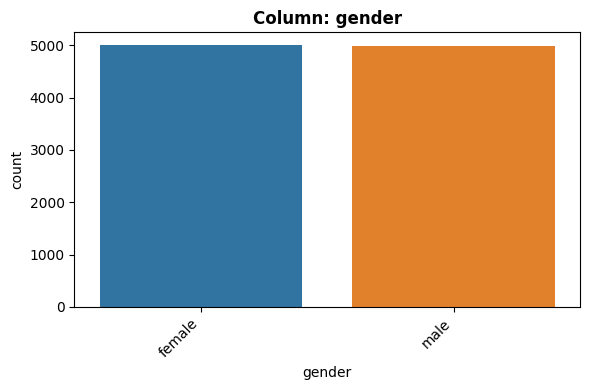

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'female' occurs 5000 times (50.1%)
- Not constant or quasi-constant.


In [22]:
#Plot Univariate visual for gender column
explore_categorical(df, 'gender', fillna=False);

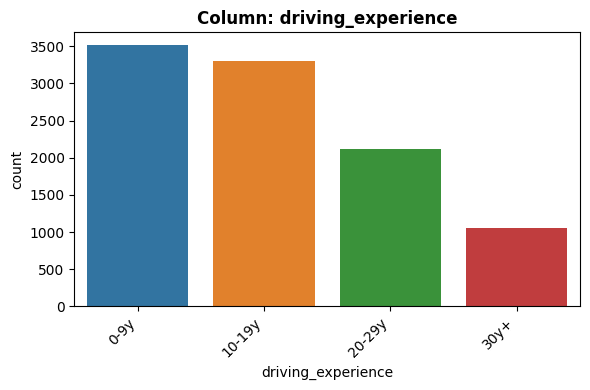

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: '0-9y' occurs 3511 times (35.18%)
- Not constant or quasi-constant.


In [23]:
#Plot Univariate visual for gender column
explore_categorical(df, 'driving_experience', fillna=False);

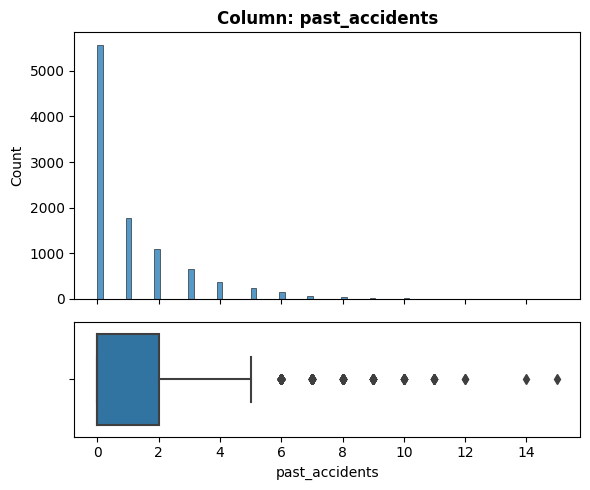

- NaN's Found: 0 (0.0%)
- Unique Values: 15
- Most common value: '0' occurs 5565 times (55.76%)
- Not constant or quasi-constant.


In [24]:
#Plot Univariate visuals for avg_glucose_level column
explore_numeric(df, 'past_accidents');

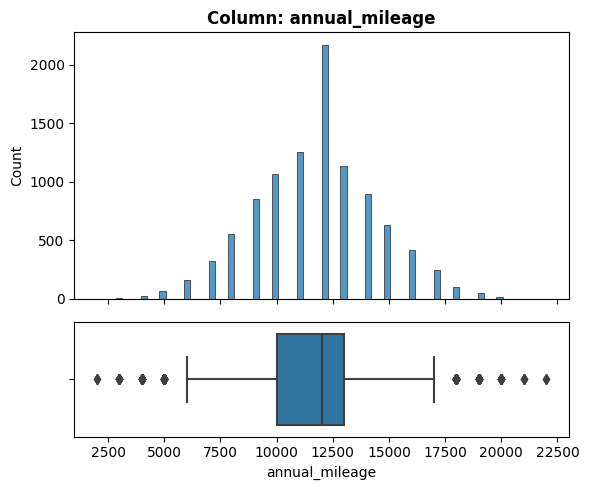

- NaN's Found: 0 (0.0%)
- Unique Values: 21
- Most common value: '12000.0' occurs 2167 times (21.71%)
- Not constant or quasi-constant.


In [25]:
#Plot Univariate visuals for avg_glucose_level column
explore_numeric(df, 'annual_mileage');

In [26]:
#Identify outliers.
df.describe()

,credit_score,vehicle_ownership,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,outcome
count,9980.000000,9980.000000,9980.000000,9980.000000,9980.000000,9980.000000,9980.000000,9980.000000,9980.000000
mean,0.516702,0.697695,0.689279,19879.325651,11724.048096,1.485772,0.239679,1.058216,0.312425
std,0.130911,0.459280,0.462812,18929.258404,2682.482776,2.243271,0.555443,1.653438,0.463505
min,0.053358,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.000000,0.000000,0.000000
25%,0.431222,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.000000,0.000000,0.000000
50%,0.525033,1.000000,1.000000,10238.000000,12000.000000,0.000000,0.000000,0.000000,0.000000
75%,0.607780,1.000000,1.000000,32765.000000,13000.000000,2.000000,0.000000,2.000000,1.000000
max,0.960819,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.000000,15.000000,1.000000


##1. Identifying any moderate or strong correlations between your target and your features and/or between one feature and another using a correlation heatmap.

In [27]:
# Create a correlation matrix
df.corr().round(2)

,credit_score,vehicle_ownership,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,outcome
credit_score,1.00,0.30,0.21,0.01,-0.16,0.19,0.12,0.17,-0.31
vehicle_ownership,0.30,1.00,0.12,-0.01,-0.09,0.13,0.09,0.12,-0.38
children,0.21,0.12,1.00,0.02,-0.42,0.22,0.12,0.21,-0.23
postal_code,0.01,-0.01,0.02,1.00,-0.13,0.11,0.04,-0.12,0.10
annual_mileage,-0.16,-0.09,-0.42,-0.13,1.00,-0.31,-0.11,-0.19,0.18
speeding_violations,0.19,0.13,0.22,0.11,-0.31,1.00,0.36,0.44,-0.29
duis,0.12,0.09,0.12,0.04,-0.11,0.36,1.00,0.26,-0.19
past_accidents,0.17,0.12,0.21,-0.12,-0.19,0.44,0.26,1.00,-0.31
outcome,-0.31,-0.38,-0.23,0.10,0.18,-0.29,-0.19,-0.31,1.00


In [28]:
corr_matrix = df.corr().round(2)
print(corr_matrix)

                     credit_score  vehicle_ownership  children  postal_code  \
credit_score                 1.00               0.30      0.21         0.01   
vehicle_ownership            0.30               1.00      0.12        -0.01   
children                     0.21               0.12      1.00         0.02   
postal_code                  0.01              -0.01      0.02         1.00   
annual_mileage              -0.16              -0.09     -0.42        -0.13   
speeding_violations          0.19               0.13      0.22         0.11   
duis                         0.12               0.09      0.12         0.04   
past_accidents               0.17               0.12      0.21        -0.12   
outcome                     -0.31              -0.38     -0.23         0.10   

                     annual_mileage  speeding_violations  duis  \
credit_score                  -0.16                 0.19  0.12   
vehicle_ownership             -0.09                 0.13  0.09   
children   

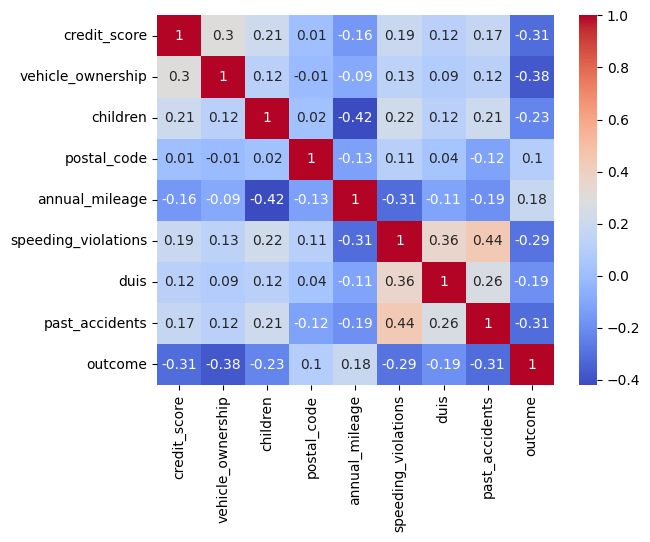

In [29]:
# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

In [30]:
positive_correlations = corr_matrix['outcome'].where(corr_matrix['outcome'] > 0).dropna()
print(positive_correlations)

postal_code       0.10
annual_mileage    0.18
outcome           1.00
Name: outcome, dtype: float64


In [31]:
positive_correlations = corr_matrix['outcome'].where(corr_matrix['outcome'] < 0).dropna()
print(positive_correlations)

credit_score          -0.31
vehicle_ownership     -0.38
children              -0.23
speeding_violations   -0.29
duis                  -0.19
past_accidents        -0.31
Name: outcome, dtype: float64


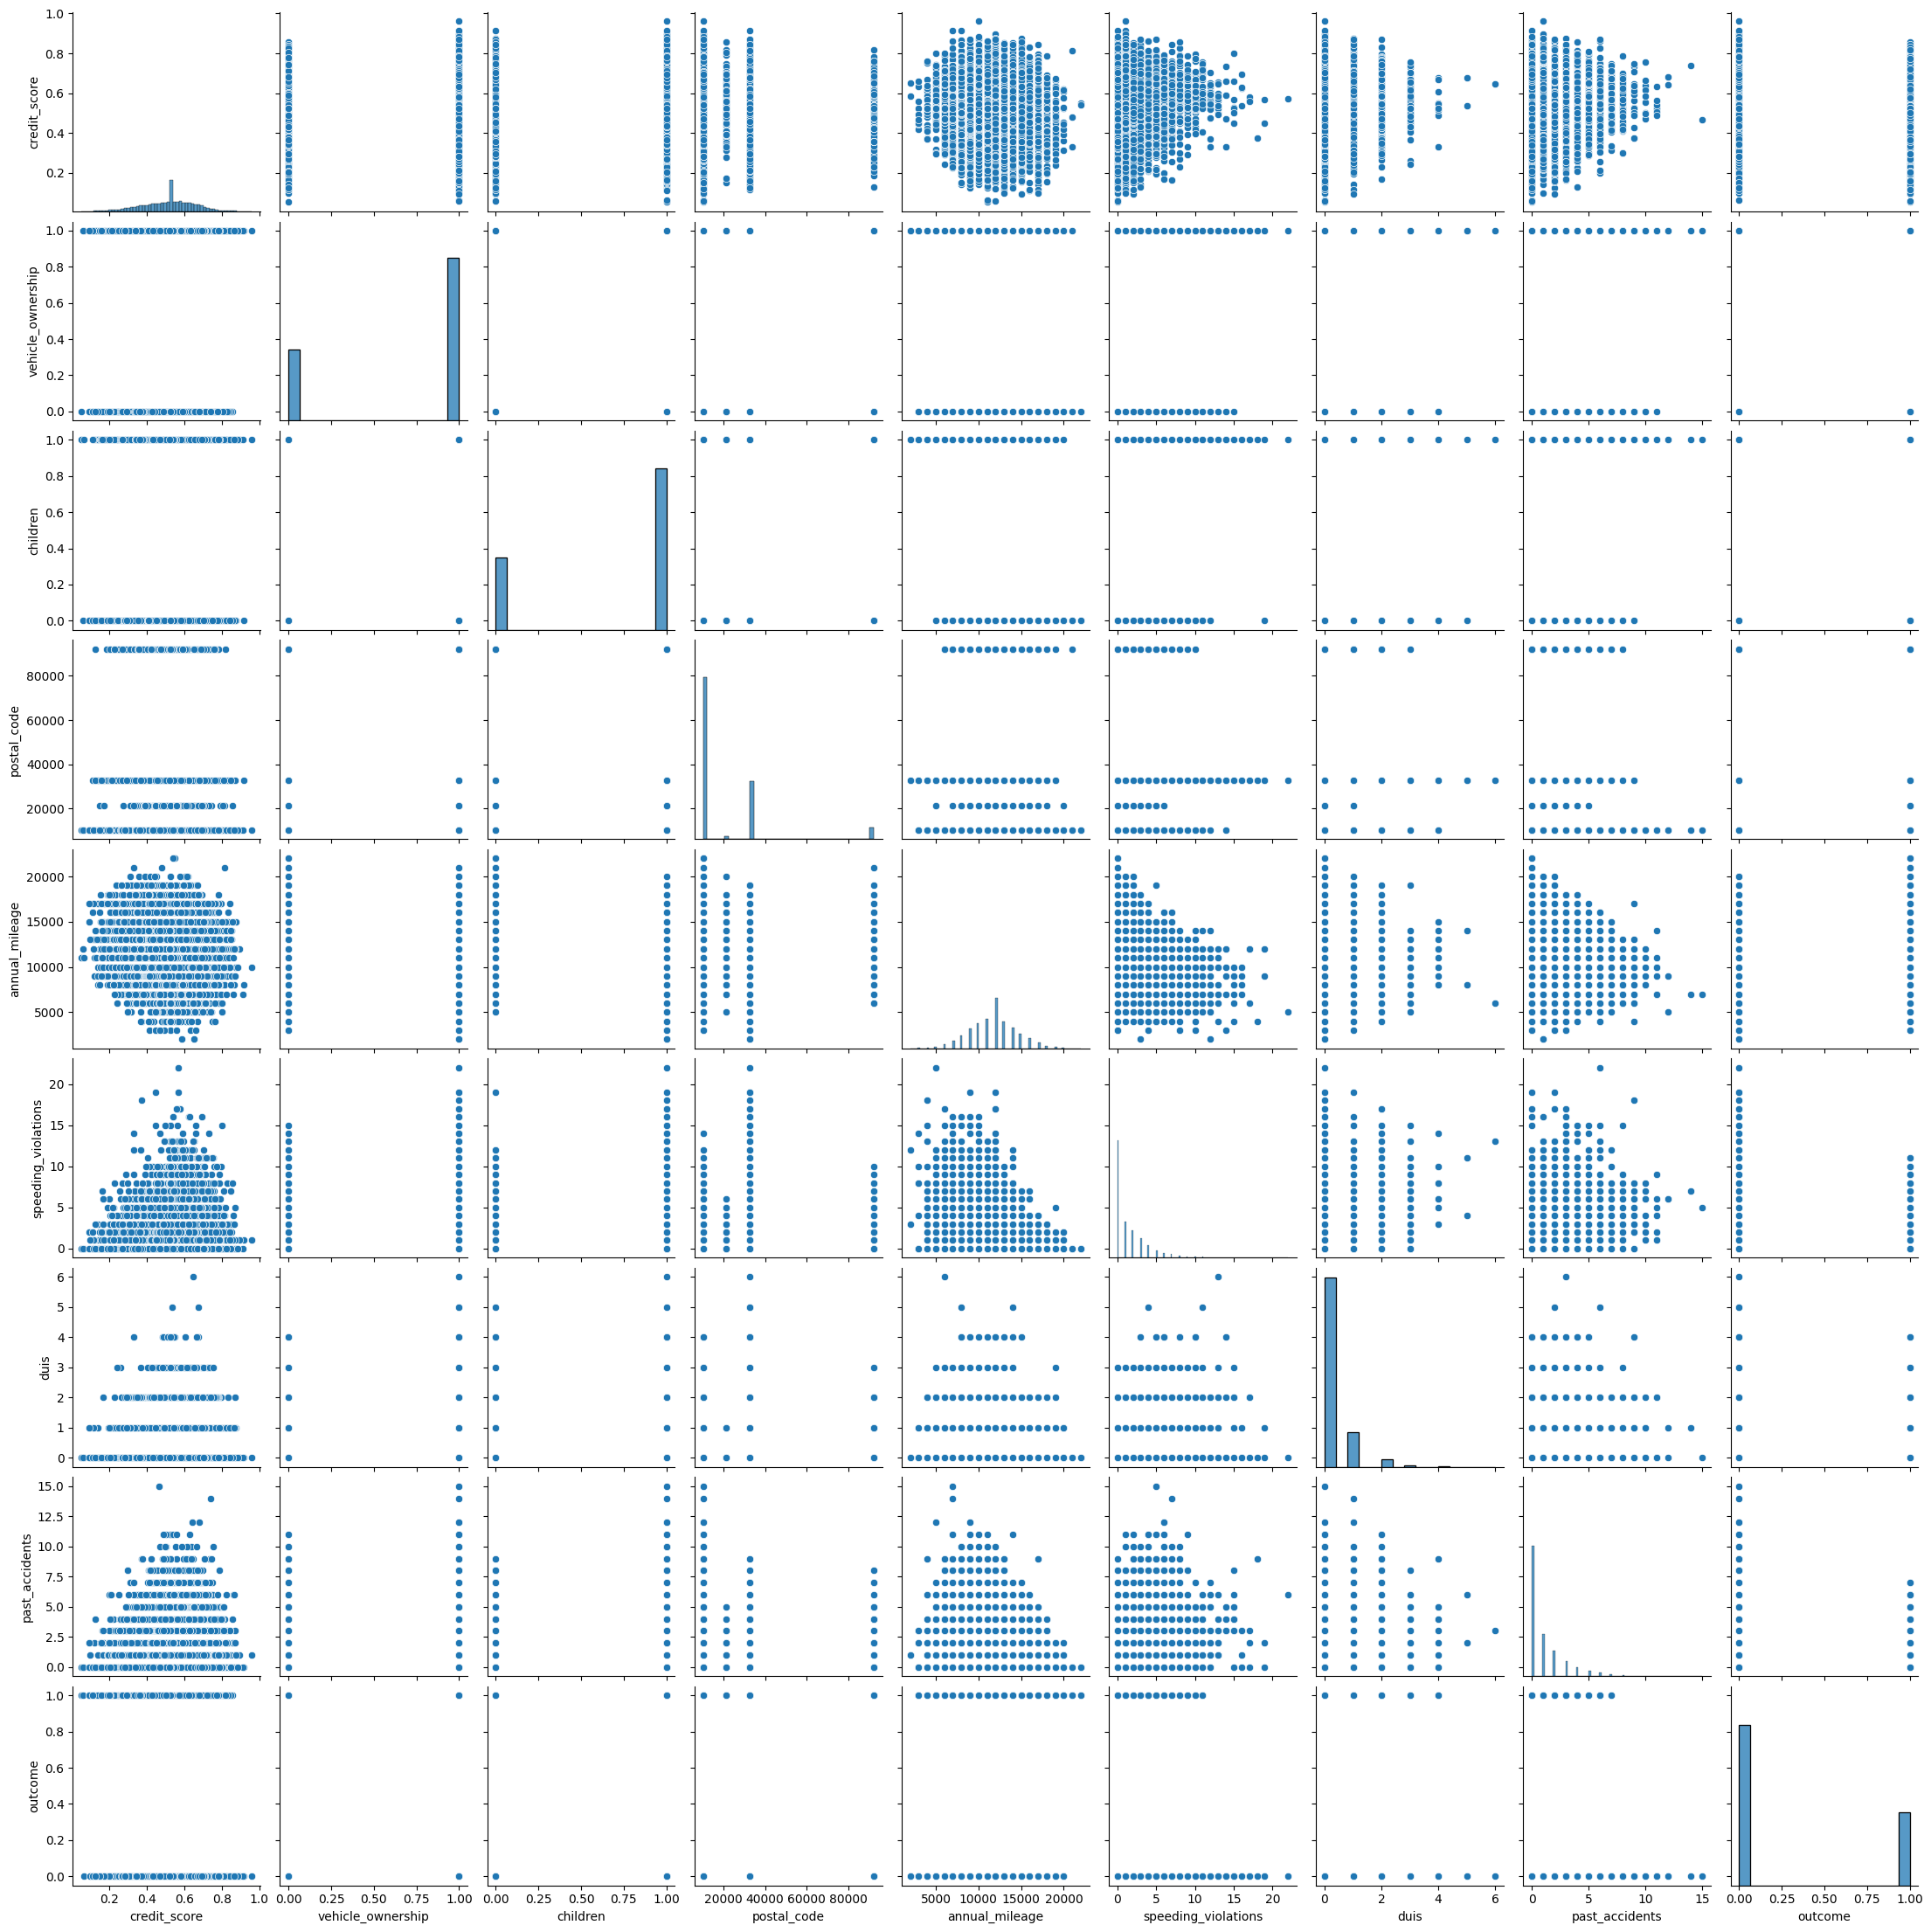

In [32]:
#Using sns pairplot to plot the relationships between all numeric variables
sns.pairplot(df);

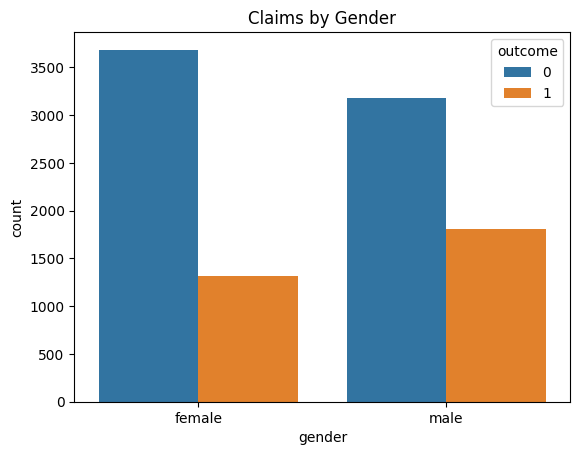

In [33]:
# Create the count plot
ax = sns.countplot(data=df, hue='outcome', x='gender')
ax.set_title("Claims by Gender");
# Display the plot
plt.show()

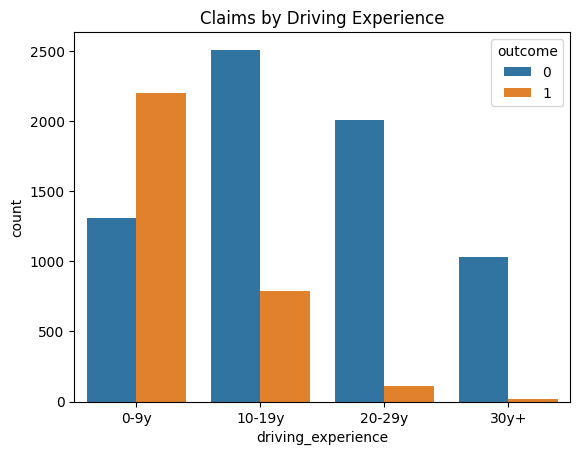

In [34]:
# Create the count plot
ax = sns.countplot(data=df, hue='outcome', x='driving_experience')
ax.set_title("Claims by Driving Experience");
# Display the plot
plt.show()

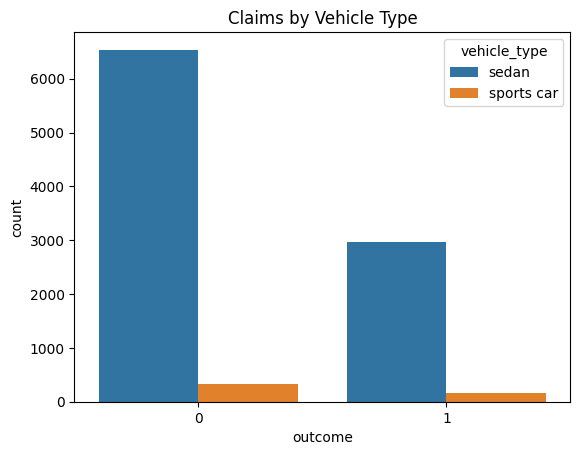

In [35]:
# Create the count plot
ax = sns.countplot(data=df, hue='vehicle_type', x='outcome')
ax.set_title("Claims by Vehicle Type");
# Display the plot
plt.show()

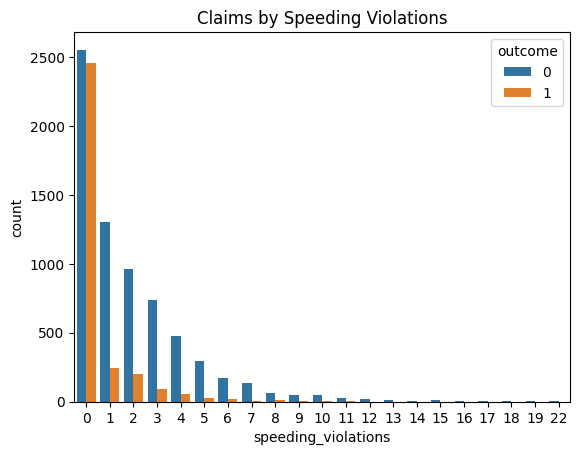

In [36]:
ax = sns.countplot(data=df, hue='outcome', x='speeding_violations')
ax.set_title("Claims by Speeding Violations");
# Display the plot
plt.show()

 ### 2. Then, choose two visualizations from your analysis that demonstrate key trends you found that will be of interest to a stakeholder.
These visuals should be reporting-quality with titles, labels, and a short explanation of the trend. Be sure to explain in a text cell the insight associated with each visual. Both of these visualizations should be easily understood by a non-technical audience (Neither of these should be histograms, boxplots, or correlation plots).

 ### Visualization 1

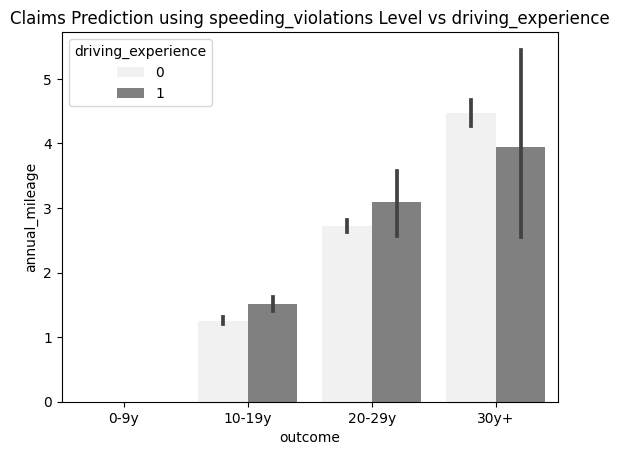

In [55]:
ax = sns.barplot(data=df, y="speeding_violations", x="driving_experience", hue='outcome', color='grey')

plt.xlabel("outcome")
plt.ylabel("annual_mileage")
plt.legend(title='driving_experience')
ax.set_title("Claims Prediction using speeding_violations Level vs driving_experience")
plt.show();

 ### Visualization 2


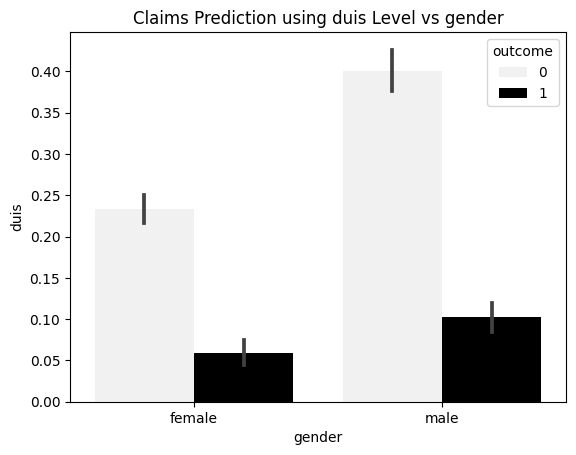

In [59]:
ax = sns.barplot(data=df, y="duis", x="gender", hue='outcome', color='black')

plt.xlabel("gender")
plt.ylabel("duis")
plt.legend(title='outcome')
ax.set_title("Claims Prediction using duis Level vs gender")
plt.show();